In [3]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
from scipy.integrate import odeint, complex_ode
from tqdm import tqdm
import cmath

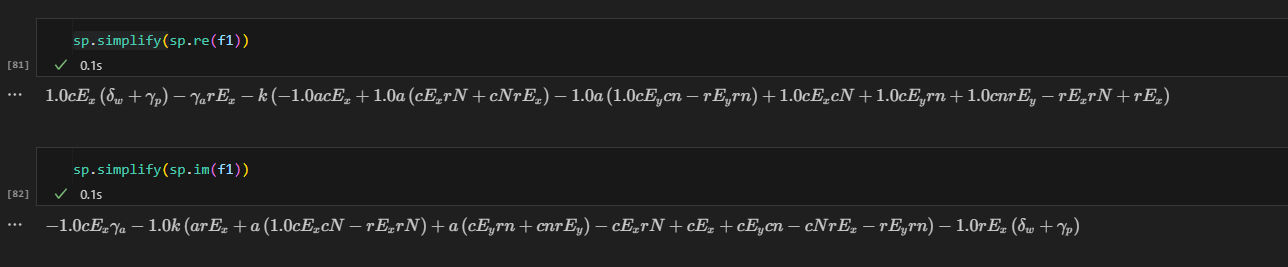

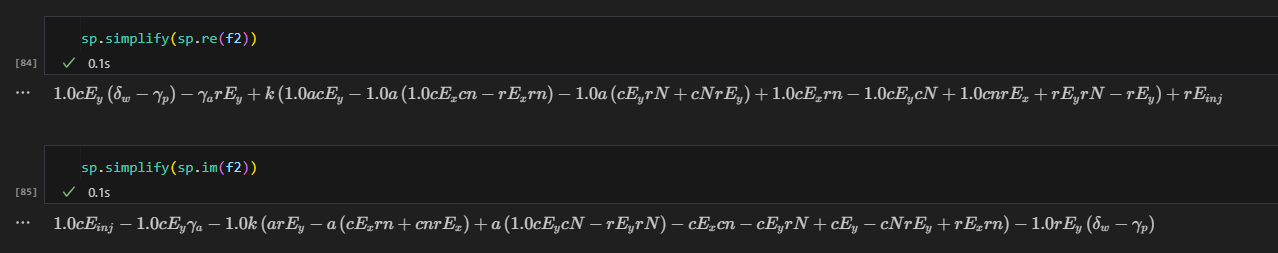

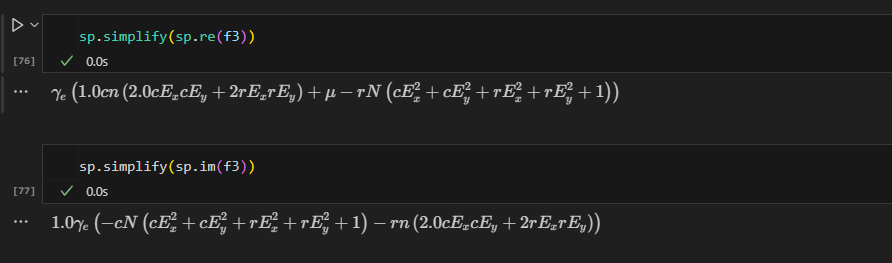

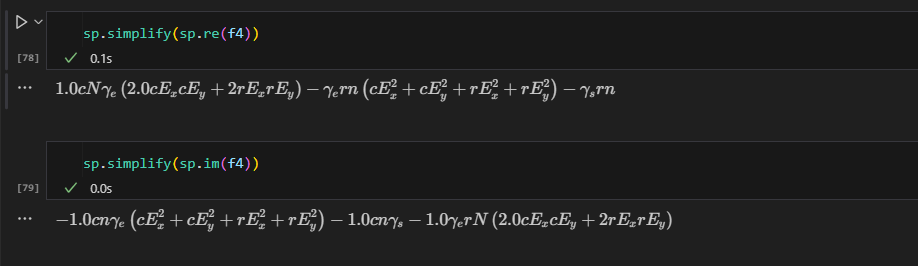

In [10]:
def solve_ode(rE_inj, cE_inj, mu,  s):
    k = 300
    a = 3
    gamma_p = 192.1
    gamma_a = 1
    gamma_s = 1000
    gamma_e = 1
    delta_w = gamma_p / 3.14

    def F(s, t):
        drE_xdt = s[1]*(delta_w + gamma_p) - gamma_a*s[0] - k*(a*(s[1]*s[4] +s[5]*s[0] - s[1] - s[3]*s[7] + s[2]*s[6]) +s[1]*s[5] + s[3]*s[6] + s[7]*s[2] - s[0]*s[4] + s[0])          #0
        dcE_xdt = -s[1]* gamma_a - k*(a*(s[0] + s[1]*s[5] -s[0]*s[4] +s[3]*s[6] + s[7]*s[2]) - s[1]*s[4] + s[1] + s[3]*s[7] - s[5]*s[0] + s[2]*s[6]) - s[0]*(delta_w + gamma_p)        #1
        drE_ydt = s[3]*(delta_w - gamma_p) - gamma_a*s[2] + k*(a*(s[3] - s[1]*s[7] + s[0]*s[6] - s[3]*s[4] + s[5]*s[3]) +s[1]*s[6] - s[3]*s[5] + s[7]*s[0] - s[2]*s[4] - s[2]) +rE_inj #2
        dcE_ydt = cE_inj -s[3]*gamma_a - k*(a*(s[2] - s[1]*s[6] -s[7]*s[0] -s[1]*s[5] - s[3]*s[4]) - s[1]*s[7] + s[3] - s[3]*s[5] - s[5]*s[2] + s[0]*s[6]) - s[2]*(delta_w - gamma_p)  #3
        drNdt   = gamma_e*(s[7]*2*(s[1]*s[3] + s[0]*s[2]) + mu -s[6]*(s[0]**2 + s[1]**2+s[2]**2+s[3]**2+1))                                 #4
        dcNdt   = gamma_e*(-s[6]*2*(s[1]*s[3] + s[0]*s[2]) -s[5]*(s[0]**2 + s[1]**2)+s[2]**2+s[3]**2+1)                                     #5
        drndt   = gamma_e *s[5]*2*(s[1]*s[3]+s[0]*s[2]) - gamma_e*s[6]*(s[0]**2 + s[1]**2+s[2]**2+s[3]**2) - gamma_s*s[6]                   #6
        dcndt   = -gamma_e*s[7]*(s[0]**2 + s[1]**2+s[2]**2+s[3]**2) - gamma_s*s[7] - gamma_e*s[4]*2* (s[1]*s[3] + s[0]*s[2])                #7
        return [drE_xdt, dcE_xdt, drE_ydt, dcE_ydt, drNdt, dcNdt, drndt, dcndt]
    t = np.linspace(0.0, 105.0, 1000000)
    s0 = odeint(F, s, t)
    return s0[-10000:,0], s0[-10000:,1], s0[-10000:,2], s0[-10000:,3]



In [12]:
solve_ode(0,0,3, [1,1,1,1,1,1,1,1])

C:\Users\79213\AppData\Roaming\Python\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [13]:
J = []
l = []
dot = 600
num_d2 = 1
for i in range((dot+4)*num_d2):
    J.append(1+0.05*(i//(4*num_d2)))
    l.append(i)

<function matplotlib.pyplot.show(close=None, block=None)>

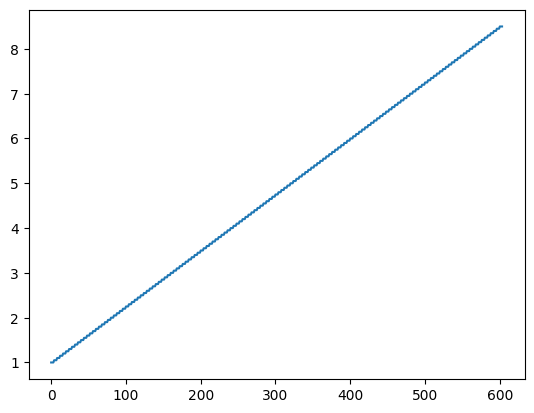

In [57]:
plt.plot(l, J)
plt.show

In [60]:
a = solve_ode(3, [3, 1, 0.8, 0.2])

TypeError: 'complex_ode' object is not subscriptable

In [58]:
Rp_max = []
Rm_max = []
Rp_min = []
Rm_min = []
num_d = 1000
for k in tqdm(range(len(J))):
    if k == 0:
        s0_max = [3, 1, 0.8, 0.2]
    else:
        s0_max = [a0[-1], a1[-1], a2[-1], a3[-1]]
    a0, a1,a2, a3 = solve_ode(J[k], s0_max)
    a0_not_sort = a0
    a1_not_sort = a1
    a0.sort()
    a1.sort()
    Rp_max.append(a0[-num_d:])
    Rp_min.append(a0[:num_d])
    Rm_max.append(a1[-num_d:])
    Rm_min.append(a1[:num_d])



  0%|          | 0/604 [00:00<?, ?it/s]


TypeError: 'complex_ode' object is not subscriptable

In [15]:
Rp_max_new = np.array(Rp_max).reshape((dot+4)*num_d)
Rm_max_new = np.array(Rm_max).reshape((dot+4)*num_d)
Rp_min_new = np.array(Rp_min).reshape((dot+4)*num_d)
Rm_min_new = np.array(Rm_min).reshape((dot+4)*num_d)

In [16]:
J = []
l = []
for i in range((dot+4)*num_d):
    J.append(1+0.05*(i//(4*num_d)))
    l.append(i)

<function matplotlib.pyplot.show(close=None, block=None)>

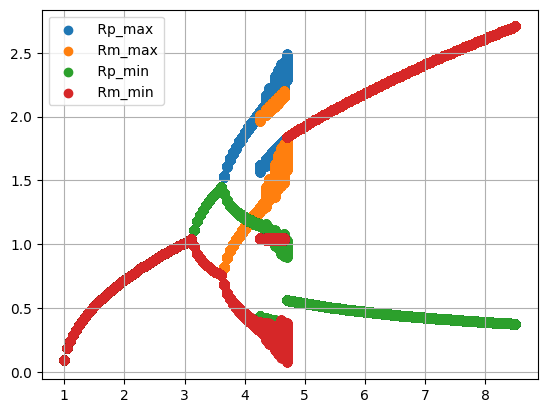

In [17]:
plt.scatter(J, Rp_max_new, label =' Rp_max')
plt.scatter(J, Rm_max_new, label =' Rm_max')
plt.scatter(J, Rp_min_new, label =' Rp_min')
plt.scatter(J, Rm_min_new, label =' Rm_min')
plt.grid()
plt.legend()
plt.show